# TimeSeries Citi Bike Analysis

This notebook will look at a timeseries analysis using the New York, Citi Bike data.  The goal is to predict based on the day of the week and the time of the day, how many people will rent bikes from a particular location.

The focus with this notebook will be on timeseries data and how to make predictions with timeseries data.

The citibike data is in the data directory in a file named:  *citibike.csv*


In [8]:
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [4]:
citibike = mglearn.datasets.load_citibike()

In [6]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

As you can see, the data consists only of a datatime column and the number of bikes rented in the 3 hour bucket of time.

Lets create a line plot of the timeseries and the number of bikes rented:


Text(0,0.5,'Rentals')

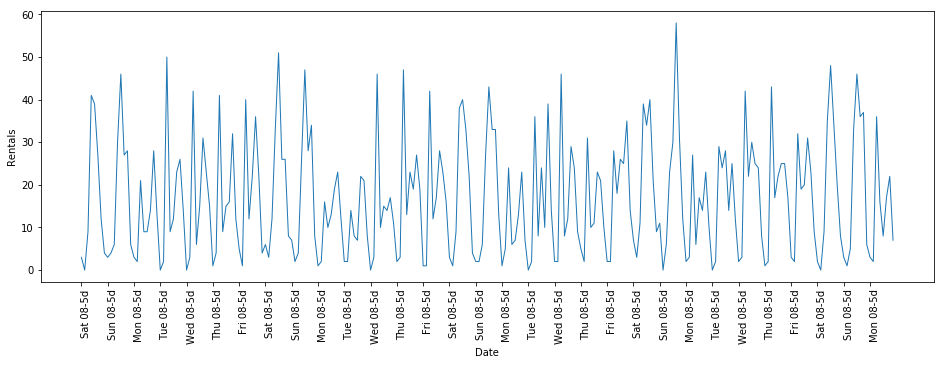

In [11]:
plt.figure(figsize=(16,5))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-5d"), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

Visualizing the data we can see various patterns for day/night, weekday/weekend.  When performing a prediction task on a time series, we usually want to learn from the past to predict the future.  The means when we do the train_test_split, we **cannot** take a random sample but instead we want to take all data up to a particular point in time as the training data, and all data past that point in time as test data.  

Looking at the data set, as it is, there is a single feature: *startime*.  

As a first attempt, lets use the startime in the unix timestamp format and try to train a model.
